In [338]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [435]:
frame = pd.read_csv("forestfires.csv", header = 0, sep = ',')

Делаем преобразование столбцов:

In [436]:
month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days = ['mon', 'tue','wed', 'thu', 'fri', 'sat', 'sun']
N = 517
counter = 1
for i in month:
    frame.month = frame.month.replace(i, counter)
    counter = counter + 1
counter = 1
for j in days:
    frame.day = frame.day.replace(j, counter)
    counter = counter + 1
frame['Is it in Portugal?'] = [1]*N

In [437]:
frame

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Is it in Portugal?
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,1
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00,1
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00,1
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00,1
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00,1


In [438]:
copy_frame = frame
copy_frame = copy_frame.reindex(np.random.permutation(len(fram)))

Построим регрессионную модель и получим оценку на $\hat{\sigma}$

In [483]:
Z = np.array(copy_frame.drop(['area', 'day'], axis = 1))
X = np.array(copy_frame.area)
first_part_Z = Z[:len(Z) * 7 / 10]
second_part_Z = Z[-(len(Z) * 3 / 10):]
first_part_X = X[:len(X) * 7 / 10]
second_part_X = X[-(len(X) * 3 / 10):]
C_mark = np.dot(first_part_Z.T, first_part_Z)
C_mark = np.linalg.inv(C_mark)
CC = np.dot(C_mark, first_part_Z.T)
Teta = np.dot(CC, first_part_X)
cur_disp = np.dot(second_part_Z, Teta)
sigma = math.sqrt(1. / (len(second_part_X) - 12) * np.linalg.norm(second_part_X - cur_disp) ** 2)
print (sigma)

29.5330179407


Неплохо! (большая дисперсия связана с тем, что у нас содержится много неинформативных столбцов).
Теперь заменим значение в столбце area c $x$ на $\log(x + c)$ и проведем несколько исследований.

In [503]:
def researches(c, cop):
    def log(x):
        return math.log(x + c)
    fcopy = cop.copy(deep = True)
    fcopy['area'] = fcopy['area'].apply(log) 
    Z = np.array(fcopy.drop(['area', 'day'], axis = 1))
    X = np.array(fcopy.area)
    first_part_Z = Z[:len(Z) * 7 / 10]
    second_part_Z = Z[-(len(Z) * 3 / 10):]
    first_part_X = X[:len(X) * 7 / 10]
    second_part_X = X[-(len(X) * 3 / 10):]
    p1 = np.dot(first_part_Z.T, first_part_Z)
    p1 = np.linalg.inv(p1)
    p2 = np.dot(p1, first_part_Z.T)
    Teta = np.dot(p2, first_part_X)
    Teta_exp = np.array([math.exp(Teta[i]) - c for i in range(12)])
    F1 = np.dot(second_part_Z, Teta)
    sigma1 = math.sqrt(1. / (len(second_part_X) - 12) * np.linalg.norm(second_part_X - F1) ** 2)
    F2 = np.dot(second_part_Z, Teta_exp)
    sigma2 = math.sqrt(1. / (len(second_part_X) - 12) * np.linalg.norm(second_part_X - F2) ** 2)
    print (sigma1)
    print(sigma2)

In [504]:
researches(1, copy_frame)

1.45054949122
1.73760864558


In [505]:
researches(0.1, copy_frame)

2.488448691
852.134848649


In [506]:
researches(0.01, copy_frame)

3.64361740153
941.557196196


In [507]:
researches(2, copy_frame)

1.17371562878
940.76073519


### Найдем константу с, при которой получается лучшее предсказание (дисперсия наименьшая)

In [502]:
def research2(c, cop):
    def log(x):
        return math.log(x + c)
    fcopy = cop.copy(deep = True)
    fcopy['area'] = fcopy['area'].apply(log) 
    Z = np.array(fcopy.drop(['area', 'day'], axis = 1))
    X = np.array(fcopy.area)
    first_part_Z = Z[:len(Z) * 7 / 10]
    second_part_Z = Z[-(len(Z) * 3 / 10):]
    first_part_X = X[:len(X) * 7 / 10]
    second_part_X = X[-(len(X) * 3 / 10):]
    p1 = np.dot(first_part_Z.T, first_part_Z)
    p1 = np.linalg.inv(p1)
    p2 = np.dot(p1, first_part_Z.T)
    Teta = np.dot(p2, first_part_X)
    Teta_exp = np.array([math.exp(Teta[i]) - c for i in range(12)])
    F1 = np.dot(second_part_Z, Teta)
    sigma = math.sqrt(1. / (len(second_part_X) - 12) * np.linalg.norm(second_part_X - F1) ** 2)
    return sigma

In [501]:
def research3(c, cop):
    def log(x):
        return math.log(x + c)
    fcopy = cop.copy(deep = True)
    fcopy['area'] = fcopy['area'].apply(log) 
    Z = np.array(fcopy.drop(['area', 'day'], axis = 1))
    X = np.array(fcopy.area)
    first_part_Z = Z[:len(Z) * 7 / 10]
    second_part_Z = Z[-(len(Z) * 3 / 10):]
    first_part_X = X[:len(X) * 7 / 10]
    second_part_X = X[-(len(X) * 3 / 10):]
    p1 = np.dot(first_part_Z.T, first_part_Z)
    p1 = np.linalg.inv(p1)
    p2 = np.dot(p1, first_part_Z.T)
    Teta = np.dot(p2, first_part_X)
    Teta_exp = np.array([math.exp(Teta[i]) - c for i in range(12)])
    F2 = np.dot(second_part_Z, Teta_exp)
    sigma = math.sqrt(1. / (len(second_part_X) - 12) * np.linalg.norm(second_part_X - F2) ** 2)
    return sigma

Для преобразованных значений

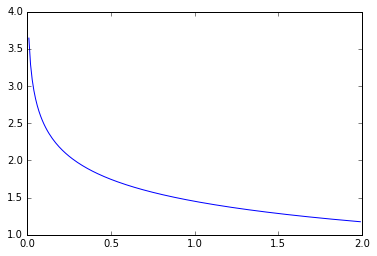

In [498]:
x_arr = np.arange(0.01, 2, 0.01)
results = np.array([research2(x_arr[i], copy_frame) for i in range(199)])
plt.plot(x_arr, results)

Для истинных значений

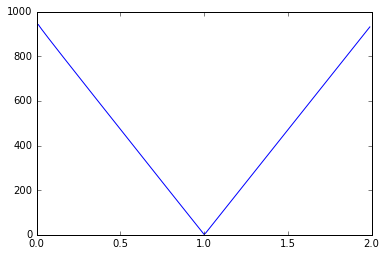

In [500]:
x_arr = np.arange(0.01, 2, 0.01)
results = np.array([research3(x_arr[i], copy_frame) for i in range(199)])
plt.plot(x_arr, results)

### Получим, что при $c = 1$ предсказание наилучшее. Теперь будем мешать нашу выборку и посмотрим на зависимость дисперсии от этого 

In [508]:
def check(c, copy):
    copy_f = copy.reindex(np.random.permutation(len(copy_frame)))
    researches(c, copy_f)

In [509]:
check(1, copy_frame)

1.75010266866
1.771099193


In [510]:
check(1, copy_frame)

1.50291825675
1.57868606795


In [511]:
check(1, copy_frame)

1.51951291128
1.55142859779


In [512]:
check(1, copy_frame)

1.35299234804
2.307435688


### Видим, что дисперсия слабо зависит от порядка строк в выборке.